In [32]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# !!!THESE ARE ONLY USED TO DOWNLOAD THE MNIST DATASET!!!
from tensorflow import keras

Downloading the dataset using keras cause it handles unpacking well and manually doing it would be a headache

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Analysing the dataset

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

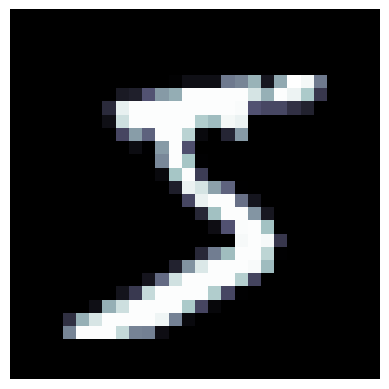

In [34]:
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
print("Unique labels in training set:", np.unique(y_train))

plt.imshow(x_train[0], cmap='bone')
plt.axis('off')


so we have about `60,000 training` images and `10,000 test` images of size `28x28` pixels with labels 0 to 9

### Making the Neural Net

In [35]:
class Neuron:
    def __init__(self, weights: list[float], bias:float):
        self.weights = weights
        self.bias = bias
        
    def calc_sum(self, input_neuron: list[float]) -> list:
        values = np.zeros(len(self.weights))

        for w in range(len(self.weights)):
            r = input_neuron[w]*self.weights[w]
            values[w] = r
        return values, np.sum(values)
    
    def activate(self, summation:float, act_func) -> float:
        return act_func(summation) + self.bias
    

class Layer:
    def __init__(self, neurons: list[Neuron], act_func):
        self.neurons = neurons
        self.act_func = act_func
    
    def forward(self, inputs: np.ndarray) -> np.ndarray:
        gen_out = np.zeros(len(self.neurons))
        
        for n, neuron in enumerate(self.neurons):
            summation = neuron.calc_sum(inputs)[1]
            gen_out[n] = neuron.activate(summation=summation, act_func=self.act_func)
        return gen_out

class Network:
    def __init__(self, layers: list[Layer]):
        self.layers = layers
    
    def forward(self, inputs: np.ndarray) -> np.ndarray:
        output = inputs
        for layer in self.layers:
            output = layer.forward(output)
        return output
    
    def predict(self, x_input: np.ndarray, y_input: int, index: int) -> list:
        inputs = x_input[index]
        output = self.forward(inputs)
        predicted = int(np.argmax(output))
        actual = y_input[index]
        return predicted, actual
    
    def evaluate(self, x_data: np.ndarray, y_data: np.ndarray, limit: int = None) -> float:
        correct = 0
        total = min(limit, len(x_data)) if limit else len(x_data)
        for i in range(total):
            if self.predict(x_data, y_data, i)[0] == y_data[i]:
                correct += 1
        return correct / total
    
    def save_weights(self, path: str = 'weights') -> None:
        os.makedirs(path, exist_ok=True)
        for i, layer in enumerate(self.layers):
            weights = [n.weights for n in layer.neurons]
            np.savetxt(f'{path}/w_layer{i+1}.txt', weights)


#  ---------- Activation Functions -------------

def sigmoid(x: float) -> float:
    return 1 / (1 + np.exp(-x))

def relu(x: float) -> float:
    return np.maximum(0, x)
    

# ---------- Data related functions ----------

def flatten_data(x_train: np.ndarray) -> list:
    flattened_x_images = []

    for i in x_train:
        flattened_x_images.append(i.flatten())
    
    return flattened_x_images


def get_rand_weights(no_neurons: int) -> list:
    return [random.uniform(-0.1, 0.1) for _ in range(no_neurons)]


In [36]:
initial_input_layer = flatten_data(x_train)
initial_input_layer = np.array(initial_input_layer)

#### Build and Test out the Network

In [37]:
NUM_INPUTS = initial_input_layer.shape[1]
NUM_NEURONS = 16
OUTPUT_NEURONS = len(np.unique(y_train))

"""
Neuron Input: List[weights], bias
Layer Input: List[Neurons], Activation_Function
"""
network = Network(layers=[
    Layer([Neuron(get_rand_weights(NUM_INPUTS), 0.0) for _ in range(NUM_NEURONS)], act_func=relu),
    Layer([Neuron(get_rand_weights(NUM_NEURONS), 0.0) for _ in range(NUM_NEURONS)], act_func=relu),
    Layer([Neuron(get_rand_weights(NUM_NEURONS), 0.0) for _ in range(OUTPUT_NEURONS)], act_func=sigmoid),
])

# Single prediction
prediction, actual = network.predict(initial_input_layer, y_train, 0)

print(prediction, actual)

# Evaluate accuracy
accuracy = network.evaluate(initial_input_layer, y_train, limit=50)
print(f'Accuracy: {accuracy:.2%}')

# Save weights
network.save_weights()

7 5
Accuracy: 10.00%


---

# Fasion MNIST

### Using the Fashion Dataset as alternative


| Label | Description |
| :--- | :--- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [38]:
(xf_train, yf_train), (xf_test, yf_test) = keras.datasets.fashion_mnist.load_data()


Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

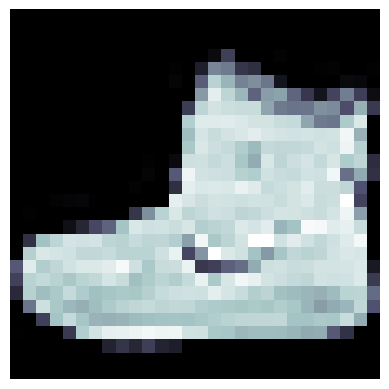

In [39]:
print("Training set shape:", xf_train.shape)
print("Test set shape:", xf_test.shape)
print("Unique labels in training set:", np.unique(yf_train))

plt.imshow(xf_train[0], cmap='bone')
plt.axis('off')


In [40]:
initial_input_layer_f = flatten_data(xf_train)
initial_input_layer_f = np.array(initial_input_layer_f)
initial_input_layer_f.shape

(60000, 784)

In [41]:
NUM_INPUTS = initial_input_layer_f.shape[1]
NUM_NEURONS = 16
OUTPUT_NEURONS = len(np.unique(yf_train))

"""
Neuron Input: List[weights], bias
Layer Input: List[Neurons], Activation_Function
"""
network_fashion = Network(layers=[
    Layer([Neuron(get_rand_weights(NUM_INPUTS), 0.0) for _ in range(NUM_NEURONS)], act_func=relu),
    Layer([Neuron(get_rand_weights(NUM_NEURONS), 0.0) for _ in range(NUM_NEURONS)], act_func=relu),
    Layer([Neuron(get_rand_weights(NUM_NEURONS), 0.0) for _ in range(OUTPUT_NEURONS)], act_func=sigmoid),
])

# Single prediction
prediction_fasion, actual_fasion = network.predict(initial_input_layer_f, yf_train, 0)

print(prediction_fasion, actual_fasion)

# Evaluate accuracy
accuracy_fasion = network_fashion.evaluate(initial_input_layer_f, yf_train, limit=50)
print(f'Accuracy: {accuracy_fasion:.2%}')

# Save weights
network_fashion.save_weights(path='weights_fasion')

8 9
Accuracy: 8.00%


---
